#### Analyst: Dhruv Singh <br> Report Name: Director's Request, Part 1 <br> Report Quarter, Year: FY 2018-2020 <br> Date Updated: 08/23/2021

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fy18 = pd.read_csv('readonly/DCIA DIRECTOR REQUEST  FY18.csv')
fy18['Year'] = '2018'

fy19 = pd.read_csv('readonly/DCIA DIRECTOR REQUEST  FY19.csv')
fy19['Year'] = '2019'

fy20 = pd.read_csv('readonly/DCIA DIRECTOR REQUEST  FY20.csv')
fy20['Year'] = '2020'

fy21 = pd.read_csv('readonly/DCIA DIRECTOR REQUEST  FY21.csv')
fy21['Year'] = '2021'

In [3]:
df = pd.concat([fy18, fy19, fy20, fy21])

In [4]:
df.head()

,State Id,Program Title,Service\nCode,Service\nTitle,Actual\nStart\nDate,Actual\nEnd\nDate,Completion\nStatus,Service\nProvider\nName,Course\nName,Credential\nType 1,...,Train\nRelated\nEmp,Non\nTraditional\nEmp,NAICS\nCode,QTR1A Exit,QTR2A Exit,QTR3A Exit,Year,OfficeName,Job\nOrder\nNo.,Q0 -Wages at Exit
0,97490,DC Infrastructure Academy,237,Submission of Local Training Package,3/22/2018,4/23/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN
1,97490,DC Infrastructure Academy,202,Career Guidance / Planning,5/31/2018,5/31/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN
2,97490,DC Infrastructure Academy,102,Initial Assessment,3/22/2018,3/22/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN
3,97490,DC Infrastructure Academy,328,Occupational Skills Training (Non-ITA),4/23/2018,4/26/2018,Successful Completion,Department of Public Works,Quick Path to Transportation (CDL),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN
4,37124,DC Infrastructure Academy,101,Orientation,6/18/2018,6/18/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,NaN,...,9,0,237990,NaN,NaN,NaN,2018,NaN,NaN,NaN


In [5]:
df.shape

(4457, 35)

In [6]:
df.columns = df.columns.str.replace("\n", "")

In [7]:
df = df.fillna(0)

In [8]:
df.head()

,State Id,Program Title,ServiceCode,ServiceTitle,ActualStartDate,ActualEndDate,CompletionStatus,ServiceProviderName,CourseName,CredentialType 1,...,TrainRelatedEmp,NonTraditionalEmp,NAICSCode,QTR1A Exit,QTR2A Exit,QTR3A Exit,Year,OfficeName,JobOrderNo.,Q0 -Wages at Exit
0,97490,DC Infrastructure Academy,237,Submission of Local Training Package,3/22/2018,4/23/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,0,...,0,0,0,0,0,0,2018,0,0.0,0.0
1,97490,DC Infrastructure Academy,202,Career Guidance / Planning,5/31/2018,5/31/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,0,...,0,0,0,0,0,0,2018,0,0.0,0.0
2,97490,DC Infrastructure Academy,102,Initial Assessment,3/22/2018,3/22/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,0,...,0,0,0,0,0,0,2018,0,0.0,0.0
3,97490,DC Infrastructure Academy,328,Occupational Skills Training (Non-ITA),4/23/2018,4/26/2018,Successful Completion,Department of Public Works,Quick Path to Transportation (CDL),0,...,0,0,0,0,0,0,2018,0,0.0,0.0
4,37124,DC Infrastructure Academy,101,Orientation,6/18/2018,6/18/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,0,...,9,0,237990,0,0,0,2018,0,0.0,0.0


In [9]:
df = df[df['ExitReason'] == "Successful Completion Employed"]

In [10]:
df.shape

(1357, 35)

In [11]:
df.to_csv('cleaned_data.csv', index = False)

#### Subsetting 1: Pie Charts

In [12]:
df1 = df[['ServiceCode', 'ServiceTitle', 'Year']]

In [13]:
df1['Count'] = 1

<ipython-input-13-46c7d78fc765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Count'] = 1


In [14]:
df1_grouped = df1[['ServiceTitle', 'Year', 'Count']].groupby(['Year', 'ServiceTitle']).agg('sum')

In [15]:
df1_grouped = df1_grouped.reset_index()

In [16]:
df1_grouped

,Year,ServiceTitle,Count
0,2018,1K Opportunities,177
1,2018,Career Counseling,54
2,2018,Career Guidance / Planning,1
3,2018,Enrolled In State And Local Training,114
4,2018,Individual Counseling,1
5,2018,Initial Assessment,87
6,2018,Job Readiness Training,20
7,2018,Occupational Skills Training (Non-ITA),116
8,2018,Orientation,149
9,2018,Provided Support/Instruction on Internet Job S...,1


In [17]:
df1_wide = df1_grouped.pivot_table(index=['ServiceTitle'], columns = 'Year', values = 'Count').reset_index()

In [18]:
df1_wide = df1_wide.fillna(0)

In [19]:
df1_wide = df1_wide.set_index('ServiceTitle')

In [20]:
df1_wide

Year,2018,2019,2020,2021
ServiceTitle,,,,
1K Opportunities,177.0,0.0,0.0,0.0
Career Counseling,54.0,0.0,0.0,0.0
Career Guidance / Planning,1.0,0.0,0.0,0.0
Enrolled In Apprenticeship Training,0.0,1.0,0.0,0.0
Enrolled In State And Local Training,114.0,187.0,11.0,15.0
Individual Counseling,1.0,0.0,0.0,0.0
Initial Assessment,87.0,0.0,0.0,0.0
Job Readiness Training,20.0,0.0,0.0,19.0
Occupational Skills Training (Non-ITA),116.0,122.0,43.0,38.0


#### Visualization 1: Services Provided

##### FY 2018

In [21]:
df1_wide_18 = df1_wide[['2018']]

In [22]:
df1_wide_18 = df1_wide_18[df1_wide_18['2018'] != 0]

In [23]:
df1_wide_18 = df1_wide_18.sort_values(by=['2018'], ascending=False)

In [24]:
df1_wide_18

Year,2018
ServiceTitle,
1K Opportunities,177.0
Orientation,149.0
Occupational Skills Training (Non-ITA),116.0
Enrolled In State And Local Training,114.0
Initial Assessment,87.0
Submission of Local Training Package,66.0
Career Counseling,54.0
Unsubsidized Employment,46.0
Staff-Assisted Job Search,22.0


In [25]:
df1_wide_18 = df1_wide_18.reset_index()

In [26]:
df1_wide_18.loc[df1_wide_18["2018"] < 40, "ServiceTitle"] = "Other"

In [27]:
df1_wide_18

Year,ServiceTitle,2018
0,1K Opportunities,177.0
1,Orientation,149.0
2,Occupational Skills Training (Non-ITA),116.0
3,Enrolled In State And Local Training,114.0
4,Initial Assessment,87.0
5,Submission of Local Training Package,66.0
6,Career Counseling,54.0
7,Unsubsidized Employment,46.0
8,Other,22.0
9,Other,20.0


In [28]:
df1_wide_18 = df1_wide_18[['ServiceTitle', '2018']].groupby('ServiceTitle').agg('sum')

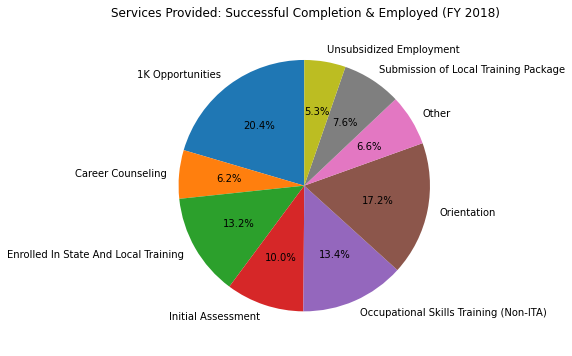

In [29]:
df1_wide_18['2018'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%', # adding in percentages
                            startangle=90,     # starting at 90 degrees
                            shadow=False,       # adding in shadow effects
                            )

plt.title('Services Provided: Successful Completion & Employed (FY 2018)')
plt.ylabel("")
plt.axis('equal') # sets pie into a circle type shape
plt.savefig('graphs/fy2018services.png', dpi=300, bbox_inches='tight')
plt.show()


##### FY 2019

In [30]:
df1_wide_19 = df1_wide[['2019']]

In [31]:
df1_wide_19 = df1_wide_19[df1_wide_19['2019'] != 0]

In [32]:
df1_wide_19 = df1_wide_19.sort_values(by=['2019'], ascending=False)

In [33]:
df1_wide_19

Year,2019
ServiceTitle,
Enrolled In State And Local Training,187.0
Occupational Skills Training (Non-ITA),122.0
Enrolled In Apprenticeship Training,1.0


In [34]:
df1_wide_19 = df1_wide_19.reset_index()

In [35]:
# df1_wide_19.loc[df1_wide_19["2019"] < 40, "ServiceTitle"] = "Other"

In [36]:
df1_wide_19

Year,ServiceTitle,2019
0,Enrolled In State And Local Training,187.0
1,Occupational Skills Training (Non-ITA),122.0
2,Enrolled In Apprenticeship Training,1.0


In [37]:
df1_wide_19 = df1_wide_19[['ServiceTitle', '2019']].groupby('ServiceTitle').agg('sum')

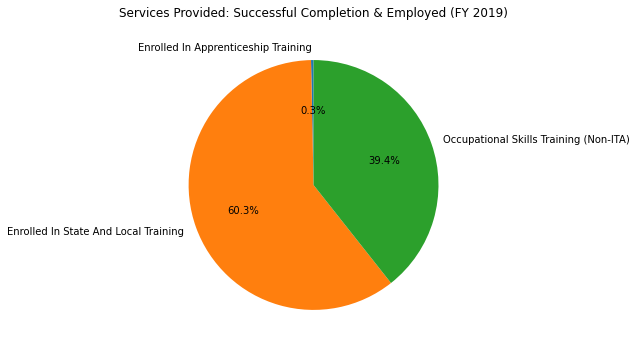

In [38]:
df1_wide_19['2019'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%', # adding in percentages
                            startangle=90,     # starting at 90 degrees
                            shadow=False,       # adding in shadow effects
                            )

plt.title('Services Provided: Successful Completion & Employed (FY 2019)')
plt.ylabel("")
plt.axis('equal') # sets pie into a circle type shape
plt.savefig('graphs/fy2019services.png', dpi=300, bbox_inches='tight')
plt.show()

##### FY 2020

In [39]:
df1_wide_20 = df1_wide[['2020']]

In [40]:
df1_wide_20 = df1_wide_20[df1_wide_20['2020'] != 0]

In [41]:
df1_wide_20 = df1_wide_20.sort_values(by=['2020'], ascending=False)

In [42]:
df1_wide_20

Year,2020
ServiceTitle,
Occupational Skills Training (Non-ITA),43.0
Enrolled In State And Local Training,11.0


In [43]:
df1_wide_20 = df1_wide_20.reset_index()

In [44]:
# df1_wide_20.loc[df1_wide_20["2020"] < 40, "ServiceTitle"] = "Other"

In [45]:
df1_wide_20

Year,ServiceTitle,2020
0,Occupational Skills Training (Non-ITA),43.0
1,Enrolled In State And Local Training,11.0


In [46]:
df1_wide_20 = df1_wide_20[['ServiceTitle', '2020']].groupby('ServiceTitle').agg('sum')

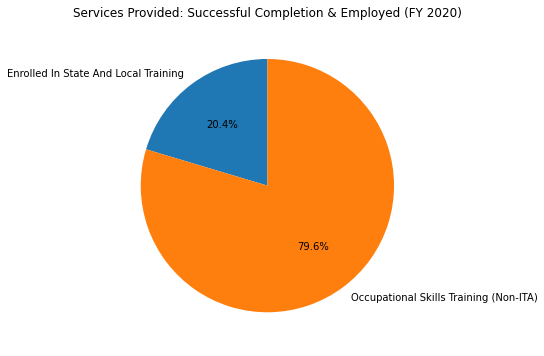

In [47]:
df1_wide_20['2020'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%', # adding in percentages
                            startangle=90,     # starting at 90 degrees
                            shadow=False,       # adding in shadow effects
                            )

plt.title('Services Provided: Successful Completion & Employed (FY 2020)')
plt.ylabel("")
plt.axis('equal') # sets pie into a circle type shape
plt.savefig('graphs/fy2020services.png', dpi=300, bbox_inches='tight')
plt.show()

##### FY 2021

In [48]:
df1_wide_21 = df1_wide[['2021']]

In [49]:
df1_wide_21 = df1_wide_21[df1_wide_21['2021'] != 0]

In [50]:
df1_wide_21 = df1_wide_21.sort_values(by=['2021'], ascending=False)

In [51]:
df1_wide_21

Year,2021
ServiceTitle,
Occupational Skills Training (Non-ITA),38.0
Unsubsidized Employment,28.0
Job Readiness Training,19.0
Enrolled In State And Local Training,15.0
Orientation,14.0
Workshops,12.0
Reading and/or Math Testing,1.0


In [52]:
df1_wide_21 = df1_wide_21.reset_index()

In [53]:
# df1_wide_21.loc[df1_wide_21["2021"] < 40, "ServiceTitle"] = "Other"

In [54]:
df1_wide_21

Year,ServiceTitle,2021
0,Occupational Skills Training (Non-ITA),38.0
1,Unsubsidized Employment,28.0
2,Job Readiness Training,19.0
3,Enrolled In State And Local Training,15.0
4,Orientation,14.0
5,Workshops,12.0
6,Reading and/or Math Testing,1.0


In [55]:
df1_wide_21 = df1_wide_21[['ServiceTitle', '2021']].groupby('ServiceTitle').agg('sum')

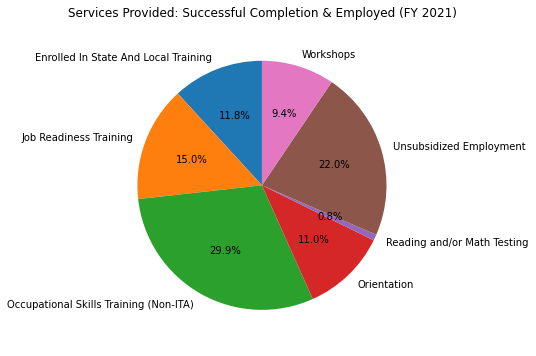

In [56]:
df1_wide_21['2021'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%', # adding in percentages
                            startangle=90,     # starting at 90 degrees
                            shadow=False,       # adding in shadow effects
                            )

plt.title('Services Provided: Successful Completion & Employed (FY 2021)')
plt.ylabel("")
plt.axis('equal') # sets pie into a circle type shape
plt.savefig('graphs/fy2021services.png', dpi=300, bbox_inches='tight')
plt.show()